In [1]:
#importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# The System of Equations Governing the Model



$\dfrac{d}{dt}S = \Lambda+\kappa R-(\beta_1 D_P+\beta_2 D_O+\beta_3 D_A+\mu)S,$

$\dfrac{d}{dt}D_P = \beta_1S D_P-(\theta+\sigma+\phi+\mu+\tau_1)D_P,$

$\dfrac{d}{dt}D_O = \beta_2 S D_O+\theta D_P-(\alpha+\tau_2+\mu+\psi)D_O,$

$\dfrac{d}{dt}D_A = \beta_3 SD_A+\psi_2 D_O-(\tau_3+\mu+\rho)D_A,$

$\dfrac{d}{dt}R_C = \sigma D_P+\alpha D_O+\rho D_A-(\mu+B)R_C,$

$\dfrac{d}{dt}R = B R_C+\phi D_P-(\mu+\kappa)R.$

In [2]:
#--------------------------
# Assumed parameter values
#--------------------------
Lambda = 0.2 #350   
mu = 0.25        #[32]
tau_1 = 0.14
tau_2 = 0.01 #0.1     #0.03
tau_3 = 0.35     #[32]
psi = 0.5 #1
kappa = 0.2
alpha = 0.2  #0.1 #0.20
rho = 0.23
sigma = 0.3     #[1]
B = 0.2         #[32]
beta_1 = 0.7    #[1]
beta_2 = 0.8 #1
beta_3 = 0.5
phi = 0.1
theta = 0.06

#changed psi, lambda, tau_2 and beta_2 vals

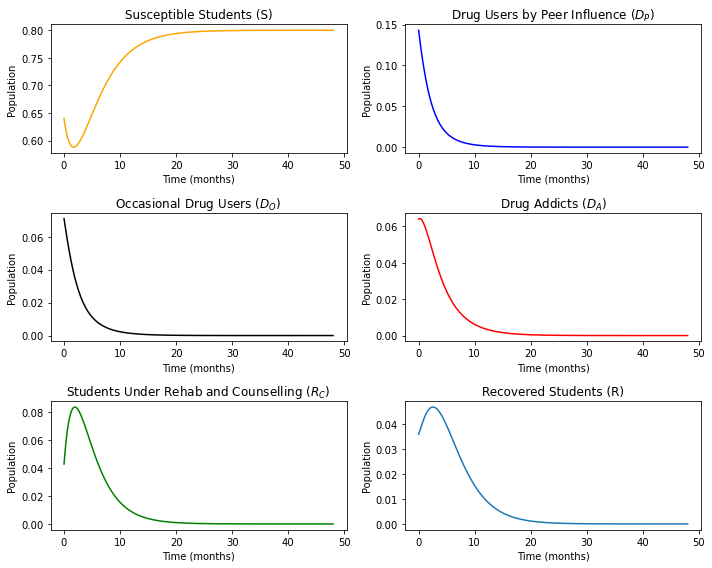

In [3]:
#--------------------------------------------------------
# Function to define the system of differential equations
#--------------------------------------------------------
def abuse_model(y, t):
    S, DP, DO, DA, RC, R = y

    dS_dt = Lambda + kappa*R - (beta_1*DP + beta_2*DO + beta_3*DA + mu)*S
    dDP_dt = beta_1*S*DP - (theta + sigma + phi + mu + tau_1)*DP
    dDO_dt = beta_2*S*DO + theta*DP - (alpha + tau_2 + mu + psi)*DO
    dDA_dt = beta_3*S*DA + psi*DO - (tau_3 + mu + rho)*DA
    dRC_dt = sigma*DP + alpha*DO + rho*DA - (mu + B)*RC
    dR_dt = B*RC + phi*DP - (mu + kappa)*R

    return [dS_dt, dDP_dt, dDO_dt, dDA_dt, dRC_dt, dR_dt]


#--------------------
# Initial conditions
#--------------------
# S0 = Lambda/mu
# DP0 = 0 #0.22
# DO0 = 0 #0.2
# DA0 = 0 #0.15
# RC0 = 0 #0.08
# R0 = 0 #0.05

S0 = 0.64    #900
DP0 = 0.143  #200
DO0 = 0.071  #100
DA0 = 0.064  #90
RC0 = 0.043  #60
R0 = 0.036   #50

initial_conditions = [S0, DP0, DO0, DA0, RC0, R0]

# Setting the Time points
months = 48   #simulating over 4 years
time_points = 1000
t = np.linspace(0, months, time_points)

# Solving the system of differential equations
sol = odeint(abuse_model, initial_conditions, t)

#=======================================================================
# Plotting the results for each compartment
plt.figure(figsize=(10, 8))

#susceptible compartment
plt.subplot(3, 2, 1)
plt.plot(t, sol[:, 0] , 'orange')
plt.xlabel('Time (months)')
plt.ylabel('Population')
#plt.ylim(0, 1)
plt.title('Susceptible Students (S)')

#D_P compartment
plt.subplot(3, 2, 2)
plt.plot(t, sol[:, 1], color='blue')
plt.xlabel('Time (months)')
plt.ylabel('Population')
#plt.ylim(0, 1)
plt.title( r'Drug Users by Peer Influence ($D_P$)')

#D_O compartment
plt.subplot(3, 2, 3)
plt.plot(t, sol[:, 2], 'black')
plt.xlabel('Time (months)')
plt.ylabel('Population')
plt.title(r'Occasional Drug Users ($D_O$)')

#D_A compartment
plt.subplot(3, 2, 4)
plt.plot(t, sol[:, 3], 'red')
plt.xlabel('Time (months)')
plt.ylabel('Population')
plt.title(r'Drug Addicts ($D_A$)')

#R_C compartment
plt.subplot(3, 2, 5)
plt.plot(t, sol[:, 4], 'green')
plt.xlabel('Time (months)')
plt.ylabel('Population')
plt.title(r'Students Under Rehab and Counselling ($R_C$)')


#Recovered compartment
plt.subplot(3, 2, 6)
plt.plot(t, sol[:, 5], )
plt.xlabel('Time (months)')
plt.ylabel('Population')
plt.title('Recovered Students (R)')

plt.tight_layout()
plt.show()


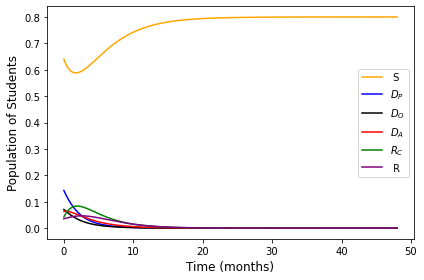

In [4]:
plt.plot(t, sol[:, 0], 'orange', label=' S')
plt.plot(t, sol[:, 1], 'blue', label= r'$D_P$')
plt.plot(t, sol[:, 2], 'black', label= r'$D_O$')
plt.plot(t, sol[:, 3], 'red', label=r'$D_A$')
plt.plot(t, sol[:, 4], 'green', label=r'$R_C$')
plt.plot(t, sol[:, 5], 'purple', label=' R')


plt.xlabel('Time (months)',fontsize=12)
plt.ylabel('Population of Students', fontsize=12)
# plt.title('Population Dynamics')
plt.legend()

plt.tight_layout()
plt.show()

# Calculating the value of $R_0$
### From section 4.4, we have $R_0 = max(r, p),$ where $r = \frac{\beta_2 \Lambda(\alpha + \tau_2 + \psi + \mu) }{\mu},$ and $p = \frac{\beta_1 \Lambda (\theta+\sigma+\phi+\tau_1+\mu)}{\mu}.$

Using parameter value involved, we calculate each to obtain that

###  $r =\frac{0.8 \cdot 0.2(0.2+0.01+0.5+0.25)}{0.25} = 0.6144000000000001, $

### $p = \frac{0.7 \times 0.2 (0.06+0.3+0.1+0.14+0.25)}{0.25} = 0.4759999999999999.$

Hence, we have that $R_0 = r.$
# $R_0 = \frac{\beta_2 \Lambda(\alpha + \tau_2 + \psi + \mu) }{\mu}$

In [5]:
T1 = beta_2*Lambda
T2 = alpha +tau_2+psi+mu
T3 = mu
R_0 = (T1*T2)/T3
R_0

0.6144000000000001

# Performing sensitivity Analysis on $R_0$

In [6]:
# Defining a function for the sensitivity index
#------------------------------------------------
def sensitivity_index(beta_2, Lambda, alpha, tau_2, psi, mu):
    R_0 = (beta_2 * Lambda * (alpha + tau_2 + psi + mu)) / mu
    #expressions for partial derivatives with respect to each parameter
    dR_0_dbeta_2 = (Lambda * (alpha + tau_2 + psi + mu)) / mu
    dR_0_dLambda = (beta_2 * (alpha + tau_2 + psi + mu)) / mu
    dR_0_dalpha = (beta_2 * Lambda) / mu
    dR_0_dpsi = (beta_2 * Lambda) / mu
    dR_0_dpsi = (beta_2 * Lambda) / mu
    dR_0_dmu = (-beta_2 * Lambda * (alpha + tau_2 + psi)) / (mu ** 2)

    #creating a didctionary for the paramters and respective partial derivatives
    sensitivity_dict = {
        "beta_2": dR_0_dbeta_2 * (beta_2 / R_0),
        "Lambda": dR_0_dLambda * (Lambda / R_0),
        "alpha": dR_0_dalpha * (alpha / R_0),
        "tau_2": dR_0_dpsi * (tau_2 / R_0),
        "psi": dR_0_dpsi * (psi / R_0),
        "mu": dR_0_dmu * (mu / R_0),
    }

    return sensitivity_dict

#======================================================
# Values of parameters involved
# Lambda = 0.2
# beta_2 = 0.8
# mu = 0.25
# tau_2 = 0.01
# psi = 0.5
# alpha = 0.10


# Calculating the sensitivity indices
sensitivity_indices = sensitivity_index(beta_2, Lambda, alpha, tau_2, psi, mu)

# Printing the sensitivity indices
print("Calculating sensitivity indices:\n")
for parameter, sensitivity_index in sensitivity_indices.items():
    print(f"Sensitivity index ({parameter}): {sensitivity_index}")


Calculating sensitivity indices:

Sensitivity index (beta_2): 1.0
Sensitivity index (Lambda): 1.0
Sensitivity index (alpha): 0.20833333333333337
Sensitivity index (tau_2): 0.010416666666666668
Sensitivity index (psi): 0.5208333333333334
Sensitivity index (mu): -0.7395833333333334


## Sensitivity Plot

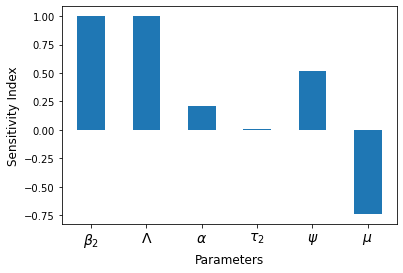

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def sensitivity_index(beta_2, Lambda, alpha, tau_2, psi, mu):
    R_0 = (beta_2 * Lambda * (alpha + tau_2 + psi + mu)) / mu

    # Expressions for partial derivatives with respect to each parameter
    dR_0_dbeta_2 = (Lambda * (alpha + tau_2 + psi + mu)) / mu
    dR_0_dLambda = (beta_2 * (alpha + tau_2 + psi + mu)) / mu
    dR_0_dalpha = (beta_2 * Lambda) / mu
    dR_0_dpsi = (beta_2 * Lambda) / mu
    dR_0_dpsi = (beta_2 * Lambda) / mu
    dR_0_dmu = (-beta_2 * Lambda * (alpha + tau_2 + psi)) / (mu ** 2)

    # Creating a dictionary for the parameters and respective partial derivatives
    sensitivity_dict = {
        "beta_2": dR_0_dbeta_2 * (beta_2 / R_0),
        "Lambda": dR_0_dLambda * (Lambda / R_0),
        "alpha": dR_0_dalpha * (alpha / R_0),
        "tau_2": dR_0_dpsi * (tau_2 / R_0),
        "psi": dR_0_dpsi * (psi / R_0),
        "mu": dR_0_dmu * (mu / R_0),
    }

    return sensitivity_dict

# Calculate the sensitivity indices
sensitivity_indices = sensitivity_index(beta_2, Lambda, alpha, tau_2, psi, mu)

# Bar plot
parameters = list(sensitivity_indices.keys())
values = list(sensitivity_indices.values())

plt.bar(parameters, values, width=0.5)
plt.xlabel('Parameters', fontsize=12)
plt.ylabel('Sensitivity Index', fontsize=12)
# plt.title('Sensitivity Indices of Parameters')
plt.xticks(np.arange(len(parameters)), [r'$\beta_2$', r'$\Lambda$', r'$\alpha$', r'$\tau_2"$', r'$\psi$', r'$\mu$'], fontsize=14)
#plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.show()


## Contact Rate Parameter Variations

- ###  $\beta_1$ Variation

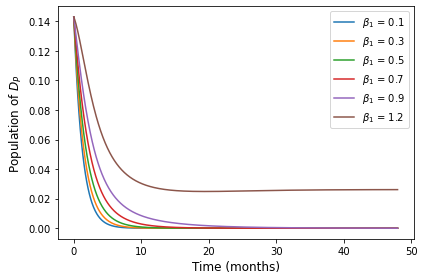

In [8]:
# Function to define the system of differential equations
def beta_1_variation(y, t, beta_1):
    S, DP, DO, DA, RC, R = y

    dS_dt = Lambda + kappa * R - (beta_1 * DP + beta_2 * DO + beta_3 * DA + mu) * S
    dDP_dt = beta_1 * S * DP - (theta + sigma + phi + mu + tau_1) * DP
    dDO_dt = beta_2 * S * DO + theta * DP - (alpha + tau_2 + mu + psi) * DO
    dDA_dt = beta_3 * S * DA + psi * DO - (tau_3 + mu + rho) * DA
    dRC_dt = sigma * DP + alpha * DO + rho * DA - (mu + B) * RC
    dR_dt = B * RC + phi * DP - (mu + kappa) * R

    return [dS_dt, dDP_dt, dDO_dt, dDA_dt, dRC_dt, dR_dt]
initial_conditions = [S0, DP0, DO0, DA0, RC0, R0]

#----------------------------------
# Time points
months = 48   # Simulating over 4 years
time_points = 1000
t = np.linspace(0, months, time_points)

#-----------------------------------
# Varying beta_1 values
beta_1_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.2]



#-----------------------
#Plotting
#----------------------
# plt.figure(figsize=(8, 6))
for beta_1 in beta_1_values:
    # Solve the system of differential equations
    sol = odeint(beta_1_variation, initial_conditions, t, args=(beta_1,))

    # Plot the results for compartment DP
    plt.plot(t, sol[:, 1], label=f'$\\beta_1$ = {beta_1}')


plt.xlabel('Time (months)', fontsize=12)
plt.ylabel(r'Population of $D_P$', fontsize=12)
# plt.title(r'Effects of Varying $\beta_1$')
plt.legend()

plt.tight_layout()
plt.show()

- ###  $\beta_2$ variation

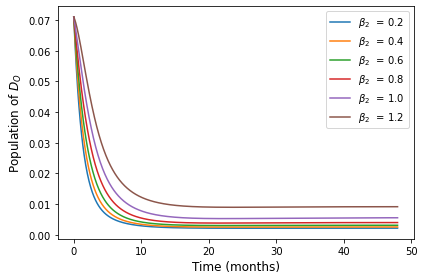

In [9]:
# Function to define the system of differential equations
def beta_2_variation(y, t, beta_2):
    S, DP, DO, DA, RC, R = y

    dS_dt = Lambda + kappa * R - (beta_1 * DP + beta_2 * DO + beta_3 * DA + mu) * S
    dDP_dt = beta_1 * S * DP - (theta + sigma + phi + mu + tau_1) * DP
    dDO_dt = beta_2 * S * DO + theta * DP - (alpha + tau_2 + mu + psi) * DO
    dDA_dt = beta_3 * S * DA + psi * DO - (tau_3 + mu + rho) * DA
    dRC_dt = sigma * DP + alpha * DO + rho * DA - (mu + B) * RC
    dR_dt = B * RC + phi * DP - (mu + kappa) * R

    return [dS_dt, dDP_dt, dDO_dt, dDA_dt, dRC_dt, dR_dt]

initial_conditions = [S0, DP0, DO0, DA0, RC0, R0]


#-----------------------------------------
# Time points
months = 48   # Simulating over 4 years
time_points = 1000
t = np.linspace(0, months, time_points)

# Varying beta_3 values
beta_2_values = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]

#------------------------------------
# Plotting
# plt.figure(figsize=(8, 6))
for beta_2 in beta_2_values:
    # Solve the system of differential equations
    sol = odeint(beta_2_variation, initial_conditions, t, args=(beta_2,))

    # Plot the results for compartment DA
    plt.plot(t, sol[:, 2], label=f'$\\beta_2$  = {beta_2}')

plt.xlabel('Time (months)', fontsize=12)
plt.ylabel(r'Population of $D_O$', fontsize=12)
# plt.title(r'Effects of Varying $\beta_2$')
plt.legend()

plt.tight_layout()
plt.show()

- ###  $\beta_3 $ variation

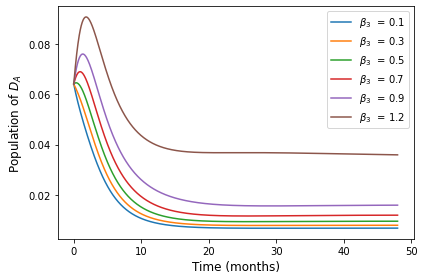

In [10]:
# Function to define the system of differential equations
def beta_3_variation(y, t, beta_3):
    S, DP, DO, DA, RC, R = y

    dS_dt = Lambda + kappa * R - (beta_1 * DP + beta_2 * DO + beta_3 * DA + mu) * S
    dDP_dt = beta_1 * S * DP - (theta + sigma + phi + mu + tau_1) * DP
    dDO_dt = beta_2 * S * DO + theta * DP - (alpha + tau_2 + mu + psi) * DO
    dDA_dt = beta_3 * S * DA + psi * DO - (tau_3 + mu + rho) * DA
    dRC_dt = sigma * DP + alpha * DO + rho * DA - (mu + B) * RC
    dR_dt = B * RC + phi * DP - (mu + kappa) * R

    return [dS_dt, dDP_dt, dDO_dt, dDA_dt, dRC_dt, dR_dt]


initial_conditions = [S0, DP0, DO0, DA0, RC0, R0]


#-----------------------------------------
# Time points
months = 48   # Simulating over 4 years
time_points = 1000
t = np.linspace(0, months, time_points)

# Varying beta_3 values
beta_3_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.2]

#------------------------------------
# Plotting
# plt.figure(figsize=(8, 6))
for beta_3 in beta_3_values:
    # Solve the system of differential equations
    sol = odeint(beta_3_variation, initial_conditions, t, args=(beta_3,))

    # Plot the results for compartment DA
    plt.plot(t, sol[:, 3], label=f'$\\beta_3$  = {beta_3}')

plt.xlabel('Time (months)', fontsize=12)
plt.ylabel(r'Population of $D_A$',fontsize=12)
# plt.title(r'Effects of Varying $\beta_3$')
plt.legend()
# plt.grid(True)

plt.tight_layout()
plt.show()